<a href="https://colab.research.google.com/github/AugustinCablant/Viager/blob/main/Statistiques%20descriptives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ce document est destiné à effectuer des analyses de données sur le fichier csv créé dans viagers-init et sur la population en générale**

## Importations


In [1]:
!pip install geopandas
import pandas as pd
import numpy as np
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Stage')
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from dateutil import parser
from datetime import datetime
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 106.6 MB/s eta 0:00:00
Mounted at /content/drive


## Nomenclature

> Nous notons Ts la durée de vie en jours d'un individu.

> Nous notons Td l'âge de l'individu (en jours) au moment où la personne vend son bien en viager.





In [ ]:
df = pd.read_csv('final.csv')
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'nom', 'sexe', 'prenoms_x', 'prenoms_y',
       'ybirth', 'ydeath', 'mdeath', 'ddeath',
       ...
       'done1', 'identification', 'codebirth', 'codebirth.1', 'nbdeath',
       'type_y', 'reserve', 'fichier', 'allobs', 'Dpt_naissance_y'],
      dtype='object', length=101)

In [ ]:
def convert_to_datetime(row):
    try:
        year = int(row['ybirth_x'])
        month = int(row['mbirth_x'])
        day = int(row['dbirth_x'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT

df['date_naissance'] = df.apply(convert_to_datetime, axis=1)

def convert_to_datetime(row):
    try:
        year = int(row['ydeath'])
        month = int(row['mdeath'])
        day = int(row['ddeath'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT

df['date_deces'] = df.apply(convert_to_datetime, axis=1)

df['Td'] = (df['date_deces'] - df['date_naissance']).dt.days

df['Date_acte_authentique'] = df['Date_acte_authentique'].apply(pd.to_datetime)
#df['Date_acte_authentique'] = pd.to_datetime(df['Date_acte_authentique'], errors='coerce')
df['Ts'] = (df['Date_acte_authentique'] - df['date_naissance']).dt.days

In [45]:
df = pd.read_csv('travail_final.csv')
df['A_prenoms'] = df['A_prenoms'].str.upper()


df['element_match'] = 0

for i in df.index.to_list():
  if pd.notnull(df['B_nom'][i]):
    df['element_match'][i] = 4 # nom, sexe, prenoms, annee naissance

    if df['B_mois'][i] == df['A_mois'][i]:
      df['element_match'][i] = df['element_match'][i] + 1

    if df['B_jour'][i] == df['A_jour'][i]:
      df['element_match'][i] = df['element_match'][i] + 1

    if df['B_departement'][i] == df['A_departement'][i]:
      df['element_match'][i] = df['element_match'][i] + 1

<ipython-input-45-40d4a546b2ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['element_match'][i] = 4 # nom, sexe, prenoms, annee naissance
<ipython-input-45-40d4a546b2ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['element_match'][i] = df['element_match'][i] + 1
<ipython-input-45-40d4a546b2ba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['element_match'][i] = df['element_match'][i] + 1
<ipython-input-45-40d4a54

In [51]:
df = df[['head',
 'element_match',
 'Adresse_bien_vendu',
 'A_nom',
 'A_prenoms',
 'A_annee',
 'A_mois',
 'A_jour',
 'A_departement',
 'A_abroad',
 'A_ville',
 'A_sexe',
 'abroad',
 'B_nom',
 'B_sexe',
 'B_prenoms',
 'B_mois',
 'B_jour',
 'B_annee',
 'B_pays',
 'B_ville',
 'B_departement',
 'D_annee',
 'D_mois',
 'D_jour',
 'match',
 'codebirth',
 'nbdeath',
 'reserve',
 'fichier',
 'Prenom_vendeur_1',
 'Nom_vendeur_1',
 'Nom_vendeur_2',
 'Nom_acheteur_2',
 'Type_de_viager',
 'Majoration',
 'Bouquet',
 'Rente',
 'Tete_1',
 'Tete_2',
 'Commission',
 'Milliemes',
 'Standing',
 'Remarques',
 'Valeur_libre',
 'Valeur_occupee',
 'Numero',
 'Repertoire',
 'Prenom_vendeur_2',
 'Date_naissance_vendeur_1',
 'Ville_naissance_vendeur_1',
 'Departement_naissance_vendeur_1',
 'Pays_naissance_vendeur_1',
 'Date_naissance_vendeur_2',
 'Ville_naissance_vendeur_2',
 'Departement_naissance_vendeur_2',
 'Pays_naissance_vendeur_2',
 'Adresse_vendeur',
 'Nom_acheteur_1',
 'Profession_acheteur_1',
 'Date_naissance_acheteur_1',
 'Profession_acheteur_2',
 'Date_naissance_acheteur_2',
 'Adresse_acheteur',
 'Indexation_rente',
 'Date_acte_authentique',
 'Payeur_Com',
 'Chambre_de_bonnes',
 'Nb_pieces',
 'Etage',
 'Mettres_carres',
 'Ascenseur',
 'Parking_Box',
 'Cave',
 'Date_immeuble',
 'Pierre_de_taille',
 'source',
 'Ch_de_service',
 'Parking',
 'Bonus',
 'annee',
 'type',
 'quality',
 'justenom1',
 'societe',
 'vsociete',
 'asociete',
 'legasse',
 'nblegassenet',
 'reprise',
 'limite',
 'stranger1',
 'euro',
 'franc',
 'downp',
 'annuity',
 'VL',
 'VO',
 'done1',
 'allobs']]

df.to_csv('travail_final.csv')

## Statistiques descriptives

(Text(0.5, 1.0, 'Répartition des individus en fonction de leur date de naissance'),
 count      57.000000
 mean     1910.807018
 std         7.351964
 min      1897.000000
 25%      1905.000000
 50%      1911.000000
 75%      1915.000000
 max      1931.000000
 Name: B_annee, dtype: float64)

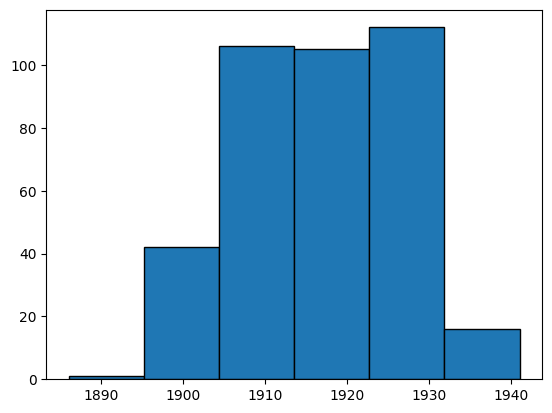

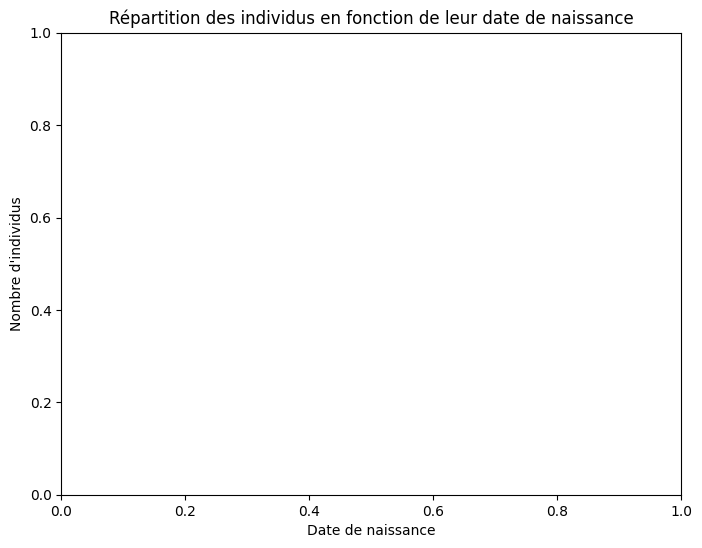

In [80]:
no_match = df[df['match'].isna()]
no_match = no_match.sort_values(by = 'A_annee')

plt.hist(no_match['A_annee'], bins=6, color='skyblue')
plt.hist(no_match['A_annee'], bins=6, edgecolor='black')

plt.figure(figsize=(8, 6))
plt.xlabel('Date de naissance')
plt.ylabel('Nombre d\'individus')
plt.title('Répartition des individus en fonction de leur date de naissance') , no_match['B_annee'].describe()

<ipython-input-83-e72cfdde7ed3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_dpt['A_departement'] = match_dpt['A_departement'].astype(int).astype(str)


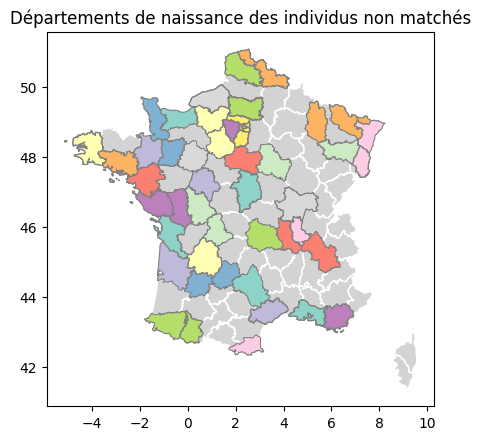

In [83]:
match_dpt = no_match[no_match['A_departement'].notnull()]
departements = gpd.read_file('departements.geojson')
match_dpt['A_departement'] = match_dpt['A_departement'].astype(int).astype(str)

merged_data = departements.merge(match_dpt, left_on='code', right_on='A_departement')

dpt_true = match_dpt['A_departement'].unique()

fig, ax = plt.subplots(figsize=(5, 5))
departements.plot(ax=ax, color='lightgray', edgecolor='white')
merged_data.plot(ax=ax, column='A_departement', legend=False, cmap='Set3', linewidth=0.8, edgecolor='gray')
ax.set_title('Départements de naissance des individus non matchés')

# Créer une légende personnalisée pour les départements présents
#departements_legend = list(no_match_dpt['Dpt_naissance'].unique())
#departements_legend_names = [departements[departements['code'] == dep]['nom'] for dep in departements_legend]
#custom_legend = [plt.Line2D([], [], marker='o', color='w', markersize=5, label=name) for name in departements_legend_names]

#plt.legend(handles=custom_legend, title='Départements')

plt.show()

In [91]:
df[pd.notnull(df['B_nom'])]

,Unnamed: 0,head,element_match,Adresse_bien_vendu,A_nom,A_prenoms,A_annee,A_mois,A_jour,A_departement,...,limite,stranger1,euro,franc,downp,annuity,VL,VO,done1,allobs
0,0,1,7,"12 rue Raffet, 75016, Paris",ABOMES,PAULE MARIE,1919.0,8.0,14.0,29.0,...,0,0,0,0,105189.821890,18293.882068,NaN,NaN,1,b'ABOMES*PAULE MARIE/ ...
1,1,1,7,"7 rue Louis David, 75016, Paris",ABOMES,PAULE MARIE,1919.0,8.0,14.0,29.0,...,0,0,0,0,51832.665861,12805.717448,NaN,NaN,1,b'ABOMES*PAULE MARIE/ ...
2,2,1,7,"7 rue de Courcelles, 75008, Paris",ABRAMA,MONIKA,1925.0,5.0,21.0,99.0,...,0,1,0,0,3811.225431,7317.552827,NaN,NaN,1,b'ABRAMA*MONIKA/ ...
4,4,1,7,"24 rue François 1er, 75008, Paris",ADAM,ETIENNE,1903.0,8.0,26.0,87.0,...,0,0,0,0,434479.699130,36587.764137,NaN,NaN,1,b'ADAM*ETIENNE JACQUES MARIE/ ...
5,5,1,7,"22 rue de l'Assomption, 75116, Paris",ADANIA,SOFIA,1914.0,9.0,18.0,99.0,...,0,1,0,1,51832.665861,18293.882068,335387.83792,228673.525860,1,b'ADANIA*SOFIA/ ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,1337,2,6,"6 rue Civiale, 75010, Paris",HARQUET,SIMONE,1927.0,8.0,12.0,NaN,...,0,-1,0,1,7622.450862,3567.307003,NaN,53357.156033,0,b'HARQUET*SIMONE PAULETTE/ ...
1339,1339,2,7,"17 rue Berteaux Dumas, 92200, Neuilly sur Seine",VORPERIAN,MARIANNE,1914.0,1.0,8.0,99.0,...,0,1,0,0,106714.312070,21952.658482,NaN,NaN,1,b'VORPERIAN*MARIANNE/ ...
1340,1340,2,7,"39 rue de Chanzy, 75011, Paris",LEVY,ROLANDE JEANNE ALEXANDRINE,1916.0,7.0,28.0,75.0,...,0,0,0,0,36587.764137,7317.552827,198183.72241,NaN,1,b'LEVY*ROLANDE JEANNE ALEXANDRINE/ ...
1341,1341,2,7,"99 rue de Sèvres, 75006, Paris",BRIAN,YVES,1908.0,1.0,13.0,47.0,...,0,1,0,0,0.000000,9146.941034,NaN,NaN,1,b'BRIAN*YVES ARMAND LOUIS/ ...


(Text(0.5, 1.0, 'Répartition des individus en fonction de leur date de naissance'),
 count     972.000000
 mean     1914.812757
 std         8.380862
 min      1891.000000
 25%      1909.000000
 50%      1914.000000
 75%      1921.000000
 max      1936.000000
 Name: B_annee, dtype: float64)

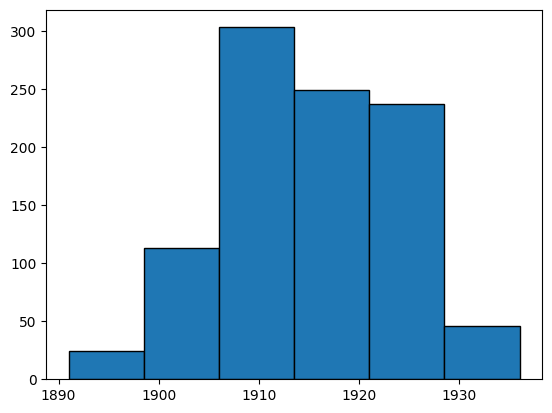

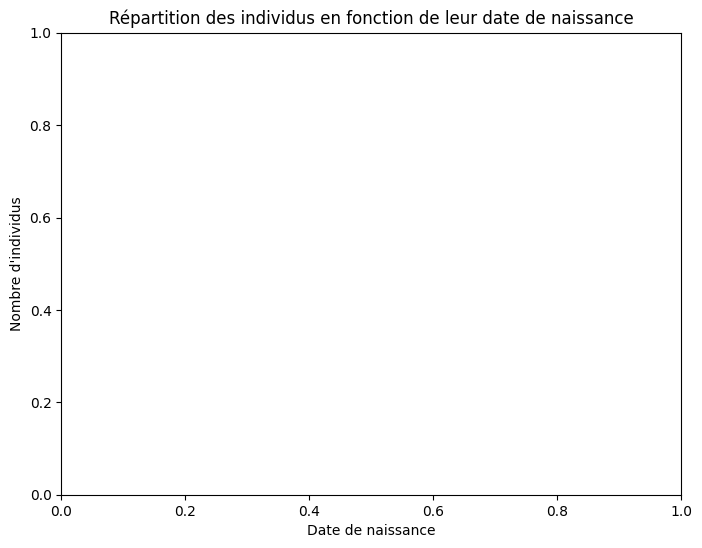

In [74]:
df = pd.read_csv('travail_final.csv')
plt.hist(df['B_annee'], bins=6, color='skyblue')
plt.hist(df['B_annee'], bins=6, edgecolor='black')

plt.figure(figsize=(8, 6))
plt.xlabel('Date de naissance')
plt.ylabel('Nombre d\'individus')
plt.title('Répartition des individus en fonction de leur date de naissance') , df['B_annee'].describe()

<ipython-input-75-92b40814deb3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_dpt['B_departement'] = match_dpt['B_departement'].astype(int).astype(str)


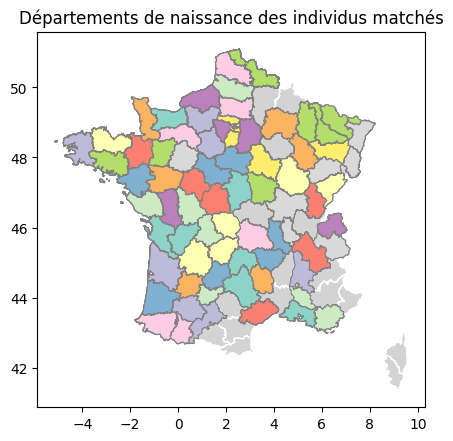

In [75]:
## Afficher les départements de naissance des individus matchés
df = pd.read_csv('travail_final.csv')

match_dpt = df[df['B_departement'].notnull()]
departements = gpd.read_file('departements.geojson')
match_dpt['B_departement'] = match_dpt['B_departement'].astype(int).astype(str)

merged_data = departements.merge(match_dpt, left_on='code', right_on='B_departement')

dpt_true = match_dpt['B_departement'].unique()

fig, ax = plt.subplots(figsize=(5, 5))
departements.plot(ax=ax, color='lightgray', edgecolor='white')
merged_data.plot(ax=ax, column='B_departement', legend=False, cmap='Set3', linewidth=0.8, edgecolor='gray')
ax.set_title('Départements de naissance des individus matchés')

# Créer une légende personnalisée pour les départements présents
#departements_legend = list(no_match_dpt['Dpt_naissance'].unique())
#departements_legend_names = [departements[departements['code'] == dep]['nom'] for dep in departements_legend]
#custom_legend = [plt.Line2D([], [], marker='o', color='w', markersize=5, label=name) for name in departements_legend_names]

#plt.legend(handles=custom_legend, title='Départements')

plt.show()

In [ ]:
df['age_mort'] = df['ydeath'].astype(int) - df['ybirth'].astype(int)

#créer des sous-df en fonction du sexe des individus

sub_df_femme = df[df['sexe']== float(2)]
sub_df_homme = df[df['sexe']== float(1)]

print("L'âge moyen de décès chez les femmes est :", sub_df_femme['age_mort'].mean().round(),
      "L'écart-type concernant l'âge de décès chez les femmes est :", sub_df_femme['age_mort'].std())
print("L'âge moyen de décès chez les hommes est :", sub_df_homme['age_mort'].mean().round(),
      "L'écart-type concernant l'âge de décès chez les hommes est :", sub_df_homme['age_mort'].std())

L'âge moyen de décès chez les femmes est : 90.0 L'écart-type concernant l'âge de décès chez les femmes est : 6.746769063364782
L'âge moyen de décès chez les hommes est : 86.0 L'écart-type concernant l'âge de décès chez les hommes est : 7.221654762434172


In [ ]:
for

# Fichier csv

In [94]:
df_final = pd.read_csv('travail_final.csv')

In [96]:
df = df_final[pd.notnull(df_final['B_nom'])]
# trouver l'âge auquel les individus sont décédés
df['age_mort'] = df['D_annee'].astype(float) - df['B_annee'].astype(float)

#créer des sous-df en fonction du sexe des individus

sub_df_femme = df[df['B_sexe']==float(2)]
sub_df_homme = df[df['B_sexe']==float(1)]

print("L'âge moyen de décès chez les femmes est :", sub_df_femme['age_mort'].mean().round(),
      "L'écart-type concernant l'âge de décès chez les femmes est :", sub_df_femme['age_mort'].std())
print("L'âge moyen de décès chez les hommes est :", sub_df_homme['age_mort'].mean().round(),
      "L'écart-type concernant l'âge de décès chez les hommes est :", sub_df_homme['age_mort'].std())

L'âge moyen de décès chez les femmes est : 90.0 L'écart-type concernant l'âge de décès chez les femmes est : 6.731212755250947
L'âge moyen de décès chez les hommes est : 86.0 L'écart-type concernant l'âge de décès chez les hommes est : 7.170785509343776


<ipython-input-96-7b6c0eae48fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_mort'] = df['D_annee'].astype(float) - df['B_annee'].astype(float)


In [ ]:
# 1 franc = 0,152449 euros
conversion = float(0.152449)
df['Bouquet_euros'] = df['Bouquet']

for i in range(df.shape[0]):
  if (pd.notnull(df['Bouquet'][i]) and df['Bouquet'][i] != '/' and len(str(df['Bouquet'][i])) > 1):
    bouquet_elements = str(df['Bouquet'][i]).split(' ')

    if (len(bouquet_elements) > 1 and bouquet_elements[1].strip() == 'Francs'):
      df['Bouquet_euros'][i] = conversion*float(bouquet_elements[0].replace(',', '.').strip())
    elif (len(bouquet_elements) > 1 and bouquet_elements[1].strip() == 'frs (voir remarques)'):
      df['Bouquet_euros'][i] = conversion*float(bouquet_elements[0].replace(',', '.').strip())
    elif (len(bouquet_elements) > 1 and bouquet_elements[1].strip() == 'francs'):
      df['Bouquet_euros'][i] = conversion*float(bouquet_elements[0].replace(',', '.').strip())
    elif (len(bouquet_elements) > 1 and bouquet_elements[1].strip() == ', francs'):
      df['Bouquet_euros'][i] = conversion*float(bouquet_elements[0].replace(',', '.').strip())

    elif (len(bouquet_elements) > 1 and bouquet_elements[1].strip() == 'Euros'):
      df['Bouquet_euros'][i] = float(bouquet_elements[0].replace(',', '.').strip())
    elif (len(bouquet_elements) > 1 and bouquet_elements[1].strip() == 'euros'):
      df['Bouquet_euros'][i] = float(bouquet_elements[0].replace(',', '.').strip())
    elif (len(bouquet_elements) > 1 and bouquet_elements[1].strip() == ', euros'):
      df['Bouquet_euros'][i] = float(bouquet_elements[0].replace(',', '.').strip())
    else:
      pass
"""
for i in range(df.shape[0]):
  if pd.notnull(df['Bouquet'][i]) and df['Bouquet'][i] != '/':

    if (re.sub(r"\d", "", str(df['Bouquet'][i]))=='Francs' or re.sub(r"\d", "", str(df['Bouquet'][i]))=='francs'
    or re.sub(r"\d", "", str(df['Bouquet'][i]))=='frs (voir remarques)' or re.sub(r"\d", "", str(df['Bouquet'][i]))==', francs'):
      #df['Bouquet_euros'][i] = conversion*float(re.sub(r"\D", "", df['Bouquet'][i]).replace(',', '.').strip())
      print(conversion*float(re.sub(r"\D", "", df['Bouquet'][i]).replace(',', '.').strip()))

    elif (re.sub(r"\d", "", str(df['Bouquet'][i]))=='Euros' or re.sub(r"\d", "", str(df['Bouquet'][i]))=='euros'
    or re.sub(r"\d", "", str(df['Bouquet'][i]))=='euros (voir remarques)' or re.sub(r"\d", "", str(df['Bouquet'][i]))==', euros'):
      #df['Bouquet_euros'][i] = float(re.sub(r"\D", "", df['Bouquet'][i]).replace(',', '.').strip())
      print(float(re.sub(r"\D", "", df['Bouquet'][i]).replace(',', '.').strip()))
    else:
      pass
  else:
    pass
df['Bouquet'][6]
"""

df['Bouquet_euros'][256]=259164
df['Bouquet_euros'][739] = conversion*float(150000)


<ipython-input-225-9e00b7330e11>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bouquet_euros'][i] = conversion*float(bouquet_elements[0].replace(',', '.').strip())
<ipython-input-225-9e00b7330e11>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bouquet_euros'][i] = float(bouquet_elements[0].replace(',', '.').strip())
<ipython-input-225-9e00b7330e11>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bouquet_euros'][i] 

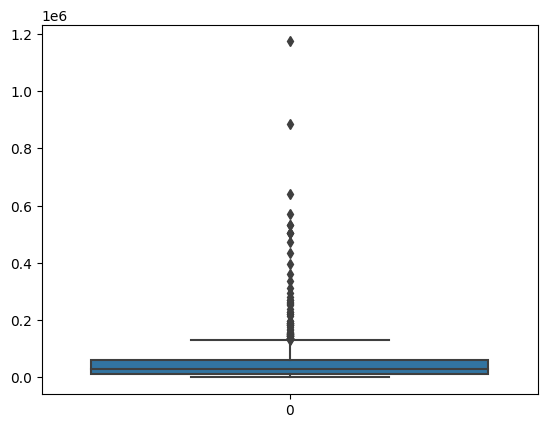

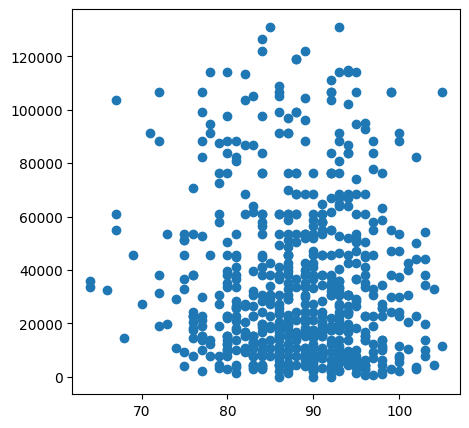

In [ ]:
sub_df = df[pd.notnull(df['Bouquet_euros'])]
indice_drop = sub_df[sub_df['Bouquet_euros']=='/'].index.tolist()
sub_df = sub_df.drop(indice_drop)

drop_bis = sub_df[sub_df['Bouquet_euros']=='voir remarques'].index.tolist()
sub_df = sub_df.drop(drop_bis)

sub_df["Bouquet_euros"] = sub_df["Bouquet_euros"].astype(float)

#On supprime les valeurs aberrantes
sns.boxplot(sub_df['Bouquet_euros'])

#On calcule Q1
q1=sub_df["Bouquet_euros"].quantile(q=0.25)

#On calcule Q3

q3=sub_df["Bouquet_euros"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = float(q1-1.5*IQR)

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = float(q3 +1.5*IQR)

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

sub_df = sub_df[sub_df["Bouquet_euros"]<borne_sup]
sub_df =sub_df[sub_df["Bouquet_euros"]>borne_inf]

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(sub_df['age_mort'],sub_df['Bouquet_euros'])

In [ ]:
# Régression linéaire (inutile)

# Données d'entraînement
X = sub_df[['Bouquet_euros']]
y = sub_df['age_mort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de régression linéaire
regression = LinearRegression()

regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Évaluer les performances du modèle en calculant l'erreur quadratique moyenne (MSE) et le coefficient de détermination (R2) :
mse,r2

(48.61360521529156, -0.009819652607780727)

# Population

## Espérance de vie

In [ ]:
# création du Data_Frame
df = pd.read_excel('esperance_vie.xlsx', sheet_name='Figure 2')
df_travail = df.iloc[3:,:3]
df_travail.columns = ['année','femme','homme']
df_travail.index = list(range(1,df_travail.shape[0]+1))
df_travail['homme'] = df_travail['homme'].fillna(0)
df_travail['femme'] = df_travail['femme'].fillna(0)
df_travail['homme'] = df_travail['homme'].astype(int)
df_travail['femme'] = df_travail['femme'].astype(int)
df_travail.head()

,année,femme,homme
1,1950,69,63
2,1951,68,63
3,1952,70,64
4,1953,70,64
5,1954,71,65


Text(0.5, 1.0, 'Évolution du taux de mortalité chez les femmes et les hommes')

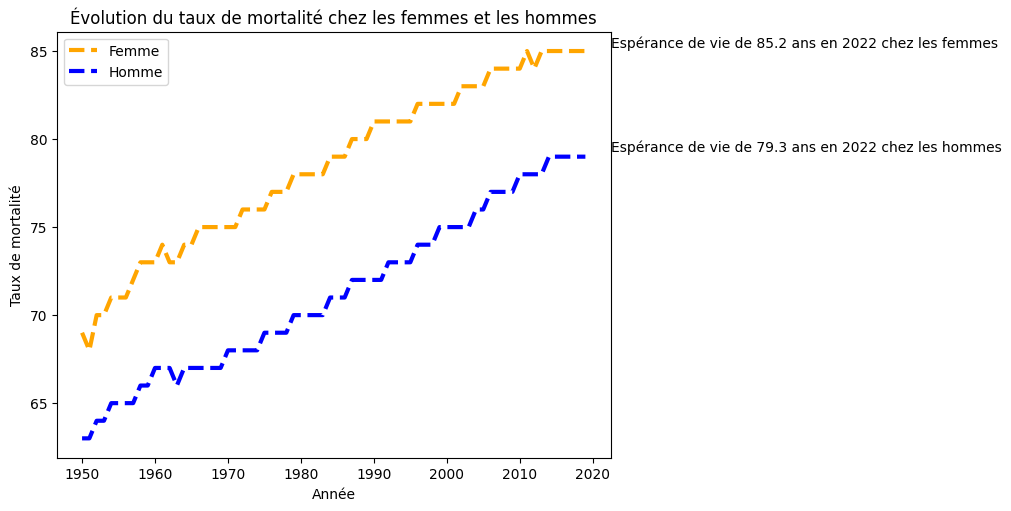

In [ ]:
# Tracer l'évolution de la mortalité chez les femmes et les hommes

df_travail['année'] = pd.to_numeric(df_travail['année'], errors='coerce')
df_travail['homme'] = pd.to_numeric(df_travail['homme'], errors='coerce')
df_travail['femme'] = pd.to_numeric(df_travail['femme'], errors='coerce')
df_travail = df_travail.dropna(subset=['homme'])
df_travail = df_travail.dropna(subset=['femme'])
df_travail = df_travail.dropna(subset=['année'])

"""
plt.plot(df_travail['année'], df_travail['femme'], label='Femme')
plt.plot(df_travail['année'], df_travail['homme'], label='Homme')

# Ajouter une légende et des titres
plt.legend()
plt.xlabel('Année')
plt.ylabel('Taux de mortalité')
plt.title('Évolution du taux de mortalité chez les femmes et les hommes')


# Afficher le graphique
plt.show()
"""
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.plot(df_travail['année'], df_travail['femme'], label='Femme', color ='orange',linewidth=3, linestyle='--')
ax.annotate('Espérance de vie de 85.2 ans en 2022 chez les femmes', xy=(2022, 85.2), xytext=(2022.5, 85.2))
ax.annotate('Espérance de vie de 79.3 ans en 2022 chez les hommes', xy=(2022, 79.3), xytext=(2022.5, 79.3))
ax.plot(df_travail['année'], df_travail['homme'], label='Homme', color ='blue',linewidth=3, linestyle='--')
ax.set_xlabel('Année')
ax.set_ylabel('Taux de mortalité')
plt.legend()
plt.title('Évolution du taux de mortalité chez les femmes et les hommes')

In [ ]:
df = pd.read_csv()